**Omar Alejandro Lezama Gallegos**

**El péndulo forzado amortiguado**


La ecuación del péndulo forzado amortiguado es

Aceleración + Amortiguamiento + Gravedad = Fuerza externa

Que como ecuación se ve:

$\ddot{\theta}+\mu \dot{\theta}+\sin(\theta)$ = A $\cos (w_d \ t)$

**1.- Límite lineal.** Considerando ángulos pequeños, tenemos la ecuación lineal forzada y amortiguada vista en clase, cuya solución particular (aquella que domina a tiempos grandes) tiene una función coseno con una cierta amplitud y fase dada en términos de los parámetros de la ecuación anterior. Tomando $A=1\ \mathrm{y}\  \mu=0.05$

**a)** Graficar la Amplitud como función de la frecuencia de la fuerza externa. ¿Existe alguna resonancia?

Antes de comenzar con los códigos usados, es conveniente colocar todas las librerías usadas de una vez para ahorrar espacio en cada uno de ellos más adelante, se encuentran colocados en el orden en que fueron usados.

In [2]:
import math #Para raíces cuadradas y funciones trigonométricas.
import matplotlib. pyplot as plt #Para graficar.
import numpy as np #Para colocar los intervalos de tiempo en las integrales.
from scipy.integrate import odeint #Para integrar ecuaciones diferenciales.

La relación entre la amplitud *D* y la frecuencia de la fuerza externa $\omega$ se expresa de la siguiente manera:

$$ D =\frac{A}{\sqrt{(\omega_0^2 - \omega^2)^2 + 4\omega^2 \beta^2}} $$

Pero tomando en cuenta las condiciones iniciales, con $\omega_0 = 1$ y que $\beta = \mu /2$, obtenemos la expresión final que será usada para este inciso:

$$ D =\frac{1}{\sqrt{(1 - \omega^2)^2 + \omega^2 \mu^2}} $$

Ahora, se mostrará el código creado.

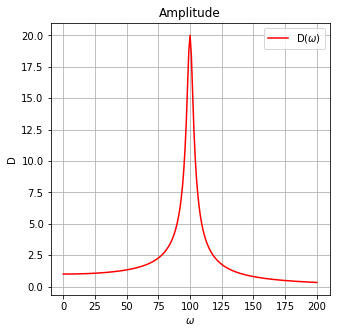

In [157]:
A = 1
w0 = 1
mu = 0.05

B = [] #Para guardar las salidas de la función, con este arreglo se hará la gráfica correspondiente.

def amp(omega): #Para obtener la amplitud cuando se varía omega.
	return A/(math.sqrt((w0**2 - omega**2)**2+(omega**2)*(mu**2))) 

for i in range (0, 201): #Rango, en este caso es de 0 a 2, pero se obtienen 200 valores en total.
	B.append(amp(i*0.01))

plt.plot(B, 'r', label='D($\omega$)')
plt.legend(loc='best')
plt.title("Amplitude")
plt.xlabel('$\omega$')
plt.ylabel('D')
plt.rcParams['figure.figsize'] = (5, 5)
plt.grid()
plt.show()

IMPORTANTE: Debido al programa creado, el eje de las abscisas se muestra incrementado en un factor de 100, esto es debido a que los datos fueron guardados en un arreglo para el cual era necesario tomar 200 valores, sin embargo, la forma de guardar éstos no pudo ser modificada mediante el método usado. Entonces, el rango de las abscisas es de 0 a 2, mientras que en el eje de las ordenadas no hubo ningún incremento en los valores.

Se observa que el punto donde la amplitud es máxima es aquel donde la frecuencia de la fuerza externa es igual a la frecuencia natural, en este caso, igual a 1. Entonces, existe resonancia cuando la frecuencia de la fuerza externa es igual a la frecuencia natural del sistema.

**b)** Graficar la Fase de la solución como función de la frecuencia de la fuerza externa.

Ahora bien, la expresión usada para relacionar a la fase $\delta$ con la frecuencia de la fuerza externa $\omega$ es: $$ \delta = tan^{-1} \left( \frac{2 \omega \beta}{\omega_0^2 - \omega^2} \right) $$

Considerando las condiciones iniciales se obtiene la expresión usada para este ejercicio:

$$ \delta = tan^{-1} \left( \frac{\omega \mu}{1 - \omega^2} \right) $$


El código creado se muestra a continuación.


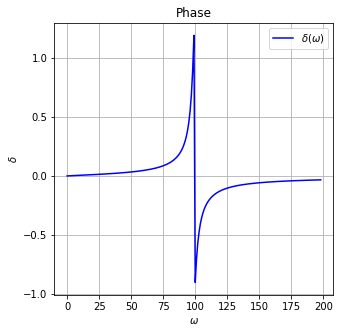

In [158]:
C = [] #Para guardar las salidas de la función, con este arreglo se hará la gráfica correspondiente

def fase(omega): #Para obtener la fase cuando se varía omega.
	return math.atan(omega*mu/(1-omega**2))

for i in range (0, 100): #Primer rango de datos.
	C.append(fase(i*0.01))

for i in range (102, 201): #Segundo rango de datos.
        C.append(fase(i*0.01))

plt.plot(C, 'b', label='$\delta (\omega)$')
plt.legend(loc='best')
plt.title("Phase")
plt.xlabel('$\omega$')
plt.ylabel('$\delta$')
plt.grid()
plt.show()

IMPORTANTE: Nuevamente, debido al trabajo que se hizo con arreglos, los valores en el eje de las abscisas se encuentra incrementado por un factor de 100. Ahora, se observa que cuando la frecuencia de la fuerza externa se aproxima al valor de la frecuencia natural existe una discontinuidad pero en la gráfica no es apreciable y se unen los extremos correspondientes. Debido a lo anterior, fue necesario separar en dos rangos diferentes los datos, debido a que cuando $\omega$ era igual a $\omega_0$ se tenía una división entre cero, la forma de evitar ésto fue simplemente omitiendo el cálculo donde ambos valores son iguales, con lo que la forma de la gráfica no se vio modificada.

**c)** Graficar el ángulo y la velocidad angular como función del tiempo para 2 condiciones iniciales distintas.

Para este inciso y el próximo se toman la expresiones del oscilador lineal amortiguado, las cuales dependen solamente de un factor de amortiguamiento $\mu$, la frecuencia natural $\omega_0$, la frecuencia de la fuerza externa $\omega$ y de la amplitud *A*.

Primero se grafica el ángulo con 2 condiciones iniciales para apreciar sus diferencias.
La función usada es $$\theta(t) = A e^{-\beta t} cos(\omega_1 t - \delta) + \frac{A}{\sqrt{(\omega_0^2 - \omega^2)^2 + 4\omega^2 \beta^2}} cos (\omega t -\delta)$$

Las condiciones iniciales se muestran el el código, las funciones ya se encuentran adecuadas para los valores de $\mu$.

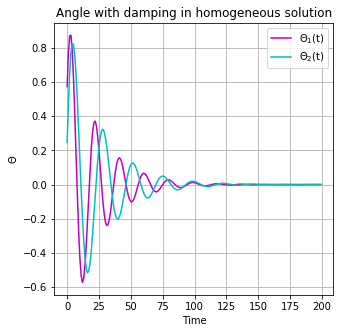

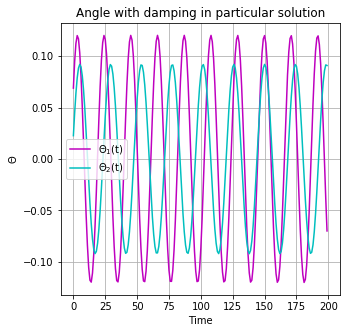

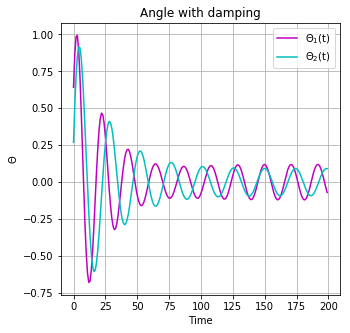

In [159]:
pi = 3.141592
Ej4A = [] #Solución particular 1 
Ej4B = [] #Solución homogénea 1
Ej4C = [] #Solución general 1
Ej4A1 = [] #Solución particular 2 
Ej4B1 = [] #Solución homogénea 2
Ej4C1 = [] #Solución general 2
mu = 0.9 #Parámetro de amortiguamiento 1
mu1 = 0.8 #Parámetro de amortiguamiento 2
omega = 3 #Frecuencia de la fuerza externa 1
omega1 = 2.6 #Frecuencia de la fuerza externa 2
w0 = 3.3 #Frecuencia natural 1
w01 = 2.7 #Frecuencia natural 2
A = 1 #Amplitud 1
A1 = 0.5 #Amplitud 2


def amp(A, w0, omega, mu): #Para obtener la amplitud en función de las condiciones iniciales.
	return A/(math.sqrt((w0**2-omega**2)**2+(omega**2)*(mu**2*omega**2)))

def fase(w0, omega, mu): #Para obtener la fase en función de las condiciones iniciales.
	return math.atan(omega*mu/(w0**2-omega**2))

def pend(t, A, w0, omega, mu): #Para obtener la solución particular.
	return amp(A, w0, omega, mu)*math.cos(omega * t - fase(w0, omega, mu))

def pens(t, w0, omega, mu): #Para obtener la solución homogénea.
        return A*math.exp(-mu*t*0.5)*math.cos(math.sqrt(w0**2-mu**2*0.25)*t - fase(w0, omega, mu))


for i in range (0, 200): #Intervalo de tiempo usado.
	Ej4A.append(pend( i*0.1, A, w0, omega, mu))
	Ej4B.append(pens( i*0.1, w0, omega, mu))
	Ej4C.append(Ej4A[i] + Ej4B[i])
	Ej4A1.append(pend( i*0.1, A1, w01, omega1, mu1))
	Ej4B1.append(pens( i*0.1, w01, omega1, mu1))
	Ej4C1.append(Ej4A1[i] + Ej4B1[i])
    
plt.plot(Ej4B, 'm', label='$\Theta_1$(t)') #Soluciones homogéneas.
plt.plot(Ej4B1, 'c', label='$\Theta_2$(t)')
plt.legend(loc='best')
plt.title('Angle with damping in homogeneous solution')
plt.xlabel('Time')
plt.ylabel('$\Theta$')
plt.grid()
plt.show()    


plt.plot(Ej4A, 'm', label='$\Theta_1$(t)') #Soluciones particulares.
plt.plot(Ej4A1, 'c', label='$\Theta_2$(t)')
plt.legend(loc='best')
plt.title('Angle with damping in particular solution')
plt.xlabel('Time')
plt.ylabel('$\Theta$')
plt.grid()
plt.show()    


plt.plot(Ej4C, 'm', label='$\Theta_1$(t)') #Soluciones generales.
plt.plot(Ej4C1, 'c', label='$\Theta_2$(t)')
plt.legend(loc='best')
plt.title('Angle with damping')
plt.xlabel('Time')
plt.ylabel('$\Theta$')
plt.grid()
plt.show()

$\omega_1$ se define como $$\sqrt(\omega_0^2 - \beta^2)  $$

Debido a las condiciones iniciales, se tiene el caso inframortiguado, pues el valor de $\beta^2$ es mejor que $\omega_0^2$, o bien $\mu^2/4 < \omega_0^2 $. Con las otras condiciones iniciales se obtiene algo similar, como se observa. Se muestran las gráficas para cada solución con dos condiciones iniciales distintas, en este caso, se muestra la solución homogénea, la particular y la suma de ambas, que sería la solución general para el caso amortiguado.

Nuevamente, debido al método usado, se tiene el eje de las abscisas incrementado en un factor de 10, entonces, los valores mostrados corresponden al intervalo de 0 a 20 tanto en las gráficas anteriores como las que se muestran para la velocidad.

Para el caso anterior, se tiene que la solución homogénea contribuye de forma considerable al inicio pero después deja de ser influyente su resultado. quedando al final solamente la solución particular.

La expresión usada para calcular la velocidad angular es la siguiente:

$$\dot\theta(t) = -\beta A e^{-\beta t} cos(\omega_1 t - \delta) - \omega_1 A e^{-\beta t} sin(\omega_1 t - \delta) - \frac{A}{\sqrt{(\omega_0^2 - \omega^2)^2 + 4\omega^2 \beta^2}} \omega sin (\omega t -\delta)$$

que corresponde a la derivada de la expresión anterior.

A continuación se muestran los casos para la velocidad.

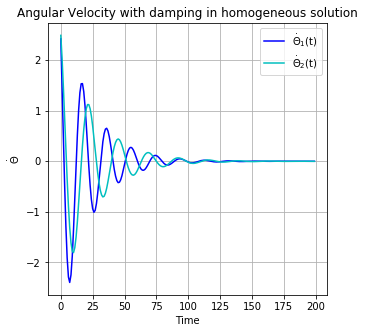

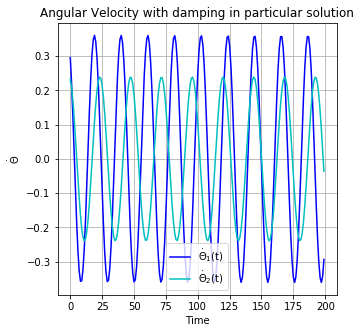

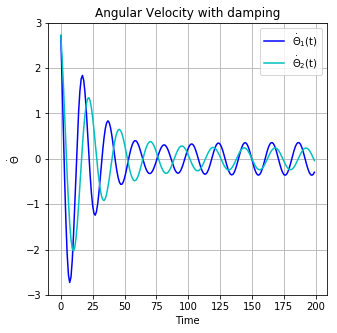

In [160]:
Ej4AA = []
Ej4BB = []
Ej4CC = []
Ej4AA1 = []
Ej4BB1 = []
Ej4CC1 = []


def pend(t, A, w0, omega, mu): #Para obtener la solución particular, las funciones ya se encuentran adecuadas para los valores de mu y no los de beta.
	return -amp(A, w0, omega, mu) * omega * math.sin(omega * t - fase(w0, omega, mu))

def pens(t, w0, omega, mu): #Para obtener la solución homogénea.
        return -mu*0.5*A*math.exp(-mu*t*0.5)*math.cos(math.sqrt(w0**2-mu**2*0.25)*t - fase(w0, omega, mu)) - math.sqrt(w0**2-mu**2*0.25)*math.sin(math.sqrt(w0**2-mu**2*0.25)*t - fase(w0, omega, mu))*A*math.exp(-mu*0.5*t)


for i in range (0, 200): #Intervalo de tiempo usado.
	Ej4AA.append(pend( i*0.1, A, w0, omega, mu))
	Ej4BB.append(pens( i*0.1, w0, omega, mu))
	Ej4CC.append(Ej4AA[i] + Ej4BB[i])
	Ej4AA1.append(pend( i*0.1, A1, w01, omega1, mu1))
	Ej4BB1.append(pens( i*0.1, w01, omega1, mu1))
	Ej4CC1.append(Ej4AA1[i] + Ej4BB1[i])

plt.plot(Ej4BB, 'b', label='$\dot\Theta_1$(t)') #Soluciones homogéneas.
plt.plot(Ej4BB1, 'c', label='$\dot\Theta_2$(t)')
plt.legend(loc='best')
plt.title('Angular Velocity with damping in homogeneous solution')
plt.xlabel('Time')
plt.ylabel('$\dot\Theta$')
plt.grid()
plt.show()    

plt.plot(Ej4AA, 'b', label='$\dot\Theta_1$(t)') #Soluciones particulares.
plt.plot(Ej4AA1, 'c', label='$\dot\Theta_2$(t)')
plt.legend(loc='best')
plt.title('Angular Velocity with damping in particular solution')
plt.xlabel('Time')
plt.ylabel('$\dot\Theta$')
plt.grid()
plt.show()    

plt.plot(Ej4CC, 'b', label='$\dot\Theta_1$(t)') #Soluciones generales.
plt.plot(Ej4CC1, 'c', label='$\dot\Theta_2$(t)')
plt.legend(loc='best')
plt.title('Angular Velocity with damping')
plt.xlabel('Time')
plt.ylabel('$\dot\Theta$')
plt.grid()
plt.show()

Para la velocidad se tiene la misma forma en las gráficas, donde la contribución de la solución homogénea es importante al inicio pero después sólo queda la solución particular. Entonces, si existe amortiguamiento en el ángulo existirá amortiguamiento en la velocidad. La amplitud ahora se ve modificada debido a que al derivar las expresiones, los factores quedan multiplicados por el parámetro de amortiguamiento $\mu$ y por $\omega_1$. Nuevamente se muestran las soluciones particulares y homogéneas para cada caso, así como la solución general que no es más que la suma de ambbas.

**d)** Graficar en el espacio fase las 2 trayectorias con condiciones iniciales distintas del inciso anterior.

Se usó el mismo programa que antes, sólo que ahora se modificaron las condiciones iniciales y se grafica la velocidad angular respecto al ángulo, pues de esta manera se obtiene el diagrama de fase.

En el siguiente código se observan las modificaciones realizadas.

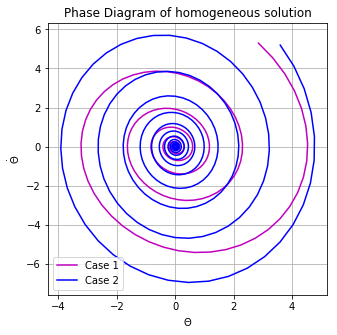

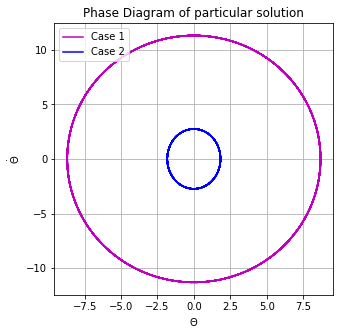

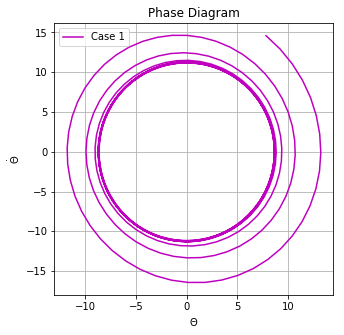

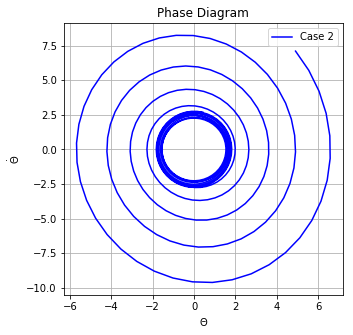

In [161]:
EjA = [] 
EjB = []
EjC = []	#Para el ángulo del primer caso.
EjA1 = []
EjB1 = []
EjC1 = []	#Para el ángulo del segundo caso.
EjAA = []
EjBB = []
EjCC = []	#Para la velocidad angular del primer caso.
EjAA1 = []
EjBB1 = []
EjCC1 = []	#Para la velocidad angular del segundo caso.

#Nuevas condiciones iniciales.
mu = 0.3
mu1 = 0.2
omega = 1.3
omega1 = 1.5
w0 = 1.4
w01 = 1.6
A = 5
A1 = 1


def amp(A, w0, omega, mu): #Para la amplitud en función de las condiciones iniciales.
	return A/(math.sqrt((w0**2-omega**2)**2+(omega**2)*(mu**2*omega**2)))

def fase(w0, omega, mu): #Para la fase en función de las condiciones iniciales.
	return math.atan(omega*mu/(w0**2-omega**2))

def pend(t, A, w0, omega, mu): #Para la solución particular de Theta.
	return amp(A, w0, omega, mu)*math.cos(omega * t - fase(w0, omega, mu))

def pens(t, w0, omega, mu): #Para la solución homogénea de Theta.
        return A*math.exp(-mu*t*0.5)*math.cos(math.sqrt(w0**2-mu**2*0.25)*t - fase(w0, omega, mu))

def pendv(t, A, w0, omega, mu): #Para la solución particular de la velocidad angular.
	return -amp(A, w0, omega, mu)*omega*math.sin(omega * t - fase(w0, omega, mu))

def pensv(t, w0, omega, mu): #Para la solución homogénea de la velocidad angular.
        return -mu*0.5*A*math.exp(-mu*t*0.5)*math.cos(math.sqrt(w0**2-mu**2*0.25)*t - fase(w0, omega, mu)) - math.sqrt(w0**2-mu**2*0.25)*math.sin(math.sqrt(w0**2-mu**2*0.25)*t - fase(w0, omega, mu))*A*math.exp(-mu*0.5*t)



for i in range (0, 500): #Intervalo de tiempo usado, incrementado por un factor de 10
	EjA.append(pend( i*0.1, A, w0, omega, mu))
	EjB.append(pens( i*0.1, w0, omega, mu))
	EjC.append(EjA[i] + EjB[i])
	EjA1.append(pend( i*0.1, A1, w01, omega1, mu1))
	EjB1.append(pens( i*0.1, w01, omega1, mu1))
	EjC1.append(EjA1[i] + EjB1[i])
	EjAA.append(pendv( i*0.1, A, w0, omega, mu))
	EjBB.append(pensv( i*0.1, w0, omega, mu))
	EjCC.append(EjAA[i] + EjBB[i])
	EjAA1.append(pendv( i*0.1, A1, w01, omega1, mu1))
	EjBB1.append(pensv( i*0.1, w01, omega1, mu1))
	EjCC1.append(EjAA1[i] + EjBB1[i])

# Espacio fase de soluciones homogéneas.    
plt.plot(EjB, EjBB, 'm', label='Case 1') 
plt.plot(EjB1, EjBB1, 'b', label='Case 2')
plt.rcParams['figure.figsize'] = (5,5)
plt.legend(loc='best')
plt.title('Phase Diagram of homogeneous solution')
plt.xlabel('$\Theta$')
plt.ylabel('$\dot\Theta$')
plt.grid()
plt.show()

# Espacio fase de soluciones particulares.
plt.plot(EjA, EjAA, 'm', label='Case 1')
plt.plot(EjA1, EjAA1, 'b', label='Case 2')
plt.legend(loc='best')
plt.title('Phase Diagram of particular solution')
plt.xlabel('$\Theta$')
plt.ylabel('$\dot\Theta$')
plt.grid()
plt.show()
    
# Espacio fase de soluciones generales.    
plt.plot(EjC, EjCC, 'm', label='Case 1')
plt.legend(loc='best')
plt.title('Phase Diagram')
plt.xlabel('$\Theta$')
plt.ylabel('$\dot\Theta$')
plt.grid()
plt.show()

plt.plot(EjC1, EjCC1, 'b', label='Case 2')
plt.legend(loc='best')
plt.title('Phase Diagram')
plt.xlabel('$\Theta$')
plt.ylabel('$\dot\Theta$')
plt.grid()
plt.show()

La trayectoria en el espacio fase es de los extremos hacia el centro, llegando a un valor límite. Lo anterior se sabe porque mientras más valores se pongan para el cálculo de las soluciones sólo incrementa la cantidad de vueltas en el centro de la figura. Entonces, se comienza con una velocidad angular y un ángulo, cuando la velocidad es cero coincide con la amplitud máxima del ángulo, y de manera similar, cuando el ángulo es cero coincide con los puntos donde la velocidad es máxima. La diferencia en este caso radica en que al tener amortiguamiento la velocidad angular y el ángulo disminuyen pero se llega a estabilizar en cierto momento de sus oscilaciones. Lo interesante es que los extremos donde se estabiliza la figura coincide con el diagrama de fase de la solución particular.

**e)** Graficar en el espacio fase 2 trayectorias con dos valores de A distintos, $\mu = 0$ y la misma condición inicial.

Ahora, para este caso se eligieron dos valores de A, con la misma frecuencia $\omega = 0.9$ y con $\omega_0 = 1$. En el código se usala función simplificada para optimizar el uso del espacio.

El código realizado:

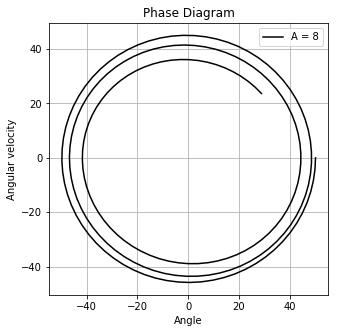

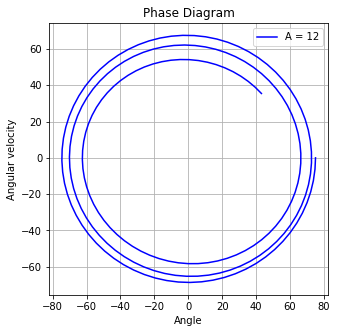

In [162]:
A1 = 8
A2 = 12
omega = 0.9
w0 = 1

d1 = [] # Ángulo 1
s1 = [] # Ángulo 2
d2 = [] # Velocidad 1
s2 = [] # Velocidad 2

def D(t, A): #Para el ángulo.
	return A*math.cos(w0*t) + A*math.cos(omega*t)/(w0**2-omega**2)

def S(t, A): #Para la velocidad angular.
	return -A*w0*math.sin(w0*t) - A*omega*math.sin(omega*t)/(w0**2-omega**2)

for i in range (0, 200): #Rango de tiempo incrementado en un factor de 10.
	d1.append(D(i * 0.1, A1))
	s1.append(S(i * 0.1, A1))
	d2.append(D(i * 0.1, A2))
	s2.append(S(i * 0.1, A2))

plt.plot(d1, s1, 'k', label='A = 8')
plt.legend(loc='best')
plt.title('Phase Diagram')
plt.xlabel('Angle')
plt.ylabel('Angular velocity')
plt.grid()
plt.show()

plt.plot(d2, s2, 'b', label='A = 12')
plt.legend(loc='best')
plt.title('Phase Diagram')
plt.xlabel('Angle')
plt.ylabel('Angular velocity')
plt.grid()
plt.show()



Lo anterior tiene sentido debido a que no hay amortiguamiento, pues entonces el desplazamiento del oscilador no va a cambiar ni la velocidad, en los puntos donde el oscilador llega a su máxima velocidad es en el punto de equilibrio, de manera similar, cuando la velocidad es mínima coinciden los extremos del desplazamiento. La forma de la gráfica se modifica de manera radical al variar los valores de omega o el intervalo de tiempo usado. Debido a que no hay amortiguamiento, las funciones usadas son muy simples, en el siguiente caso se observará que la expresión se vuelve más complicada, con la introducción de un parámetro de amortiguamiento.

**f)** Graficar en el espacio fase 2 trayectorias con $\mu = 0, 2.0, 1.0$, para la misma amplitud $A=1$ y la misma condición inicial.

El código anterior no modificó bastante en cuanto al método usado, sólo que ahora en lugar de tener diferentes valores de $A$ ahora se modifican los valores de $\mu$, con lo que se usa la función completa, a continuación el código.


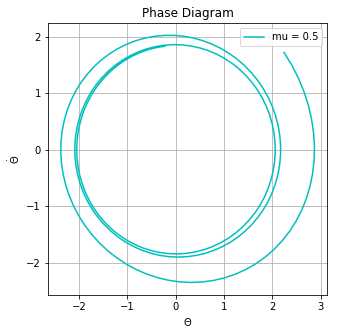

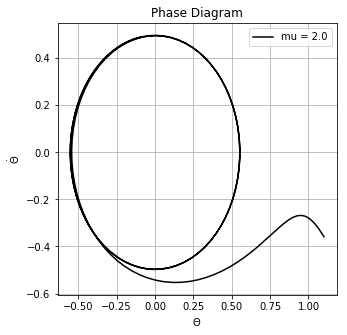

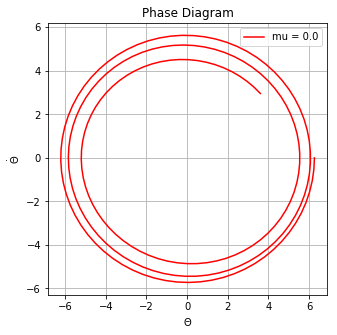

In [163]:
omega = 0.9 #Mismas condiciones iniciales para las frecuencias.
w0 = 1
mu1 = 0.5
mu2 = 2

d1 = [] #Para el primer caso.
s1 = []
d2 = [] #Para el segundo caso.
s2 = []
d3 = [] #Para el tercer caso, el cual se compara con el inciso anterior.
s3 = []


def Arco(t, mu): #Función auxiliar para obtener el valor de la función trigonométrica del ángulo.
	return math.cos(omega*t - math.atan((mu*omega)/(math.sqrt((w0**2-omega**2)**2+omega**2*mu**2))))

def Arco2(t, mu): #Función auxiliar para obtener el valor de la función trigonométrica de la velocidad angular.
        return math.sin(omega*t - math.atan((mu*omega)/(math.sqrt((w0**2-omega**2)**2+omega**2*mu**2))))

def Amp(t, mu): #Función auxiliar para obtener la amplitud del ángulo.
	return Arco(t, mu)/(math.sqrt((w0**2-omega**2)**2+omega**2*mu**2))


def Amp2(t, mu): #Función auxiliar para obtener a amplitud de la velocidad angular.
	return -omega*Arco2(t, mu)/(math.sqrt((w0**2-omega**2)**2+omega**2*mu**2))


def D(t, mu): #Para obtener el ángulo.
	return Amp(t, mu) + math.exp(-mu*t*0.5)*math.cos(math.sqrt(w0**2-mu**2*0.25)*t - math.atan((mu*omega)/(math.sqrt((w0**2-omega**2)**2+omega**2*mu**2))))


def S(t, mu): #Para obtener la velocidad angular.
	return Amp2(t, mu) - mu*0.5*math.exp(-mu*0.5*t)*math.cos(math.sqrt(w0**2-mu**2*0.25)*t - math.atan((mu*omega)/(math.sqrt((w0**2-omega**2)**2 + omega**2*mu**2)))) - math.exp(-mu*t*0.5)*math.sqrt(w0**2-mu**2*0.25)*math.sin(math.sqrt(w0**2-mu**2*0.25)*t - math.atan((mu*omega)/(math.sqrt((w0**2-omega**2)**2+omega**2*mu**2))))



for i in range (0, 200): #Intervalo de tiempo usado, incrementado por un factor de 10.
	d1.append(D(i * 0.1, mu1))
	s1.append(S(i * 0.1, mu1))
	d2.append(D(i * 0.1, mu2))
	s2.append(S(i * 0.1, mu2))
	d3.append(D(i * 0.1, 0))
	s3.append(S(i * 0.1, 0))

# Espacio fase para el primer caso.
plt.plot(d1, s1, 'c', label='mu = 0.5')
plt.legend(loc='best')
plt.title('Phase Diagram')
plt.xlabel('$\Theta$')
plt.ylabel('$\dot\Theta$')
plt.grid()
plt.show()

#Espacio fase para el segundo caso.
plt.plot(d2, s2, 'k', label='mu = 2.0')
plt.legend(loc='best')
plt.title('Phase Diagram')
plt.xlabel('$\Theta$')
plt.ylabel('$\dot\Theta$')
plt.grid()
plt.show()

#Espacio fase para el tercer caso.
plt.plot(d3, s3, 'r', label='mu = 0.0')
plt.legend(loc='best')
plt.title('Phase Diagram')
plt.xlabel('$\Theta$')
plt.ylabel('$\dot\Theta$')
plt.grid()
plt.show()



Las condiciones iniciales son las mismas a las del ejercicio anterior, pero ahora lo que se vería es el parámetro de amortiguamiento $\mu$. Nótese cómo cambia el espacio fase, a mayor coeficiente de amortiguamiento se tiene un espacio fase menos disperso, es decir, los valores de la función se aproximan más a un límite en un menor intervalo de tiempo, además, cuando no hay amortiguamiento se obtiene la misma gráfica que en el caso anterior, el cual no parece concretar su forma o llegar a un límite con las condiciones iniciales que se colocaron. Cabe mencionar que se muestran los gráficos considerando la solución general, si se tuviera sólo la solución particular se tendrían círculos o elipses en los diagramas de fase, todo depende de las soluciones consideradas y de sus condiciones iniciales.

**2.- Ecuación no lineal no forzada sin amortiguamiento.**


**a)** Para un ángulo inicial de 70 grados en reposo y una frecuencia natural unitaria, realiza una gráfica donde compares la solucion numérica del ángulo y su velocidad con aquella de la ecuación lineal usando las mismas condiciones iniciales.

En este caso, ahora se tiene la ecuación no lineal, en la cual se tiene sin($\theta$) en lugar de $\theta$, pues ya no se hace un aproximación para ángulos pequeños, quedando la expresión como se muestra:

$$\ddot\theta + \mu \theta + \omega_0^2 sin(\theta) = 0$$

Pero se tiene que no hay amortiguamiento, entonces $\mu = 0$

$\ddot\theta$ + $\omega_0^2$ sin(𝜃)  = 0

que corresponde con una ecuación no lineal, la cual se resuelve con la función mencionada en la descripción del problema.

La expresión anterior se compara con la ecuación lineal no forzada sin amortiguamiento:


$\ddot\theta$+ $\omega_0^2$ $\theta$  = 0

Nuevamente se usó de condición inicial que la frecuencia natural fuera unitaria, ahora se tienen dos casos, uno para la solución del ángulo usando la función para integrar y otro para el de la velocidad angular.

Es importante que en este caso ya no se tiene un incremento en el eje de las abscisas, pues los valores con obtenidos directamente con la función.

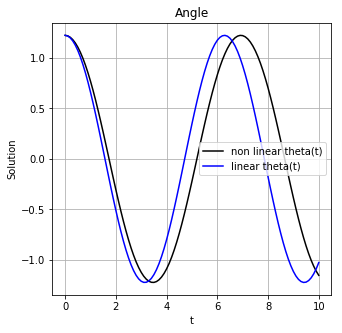

In [164]:
w0 = 1 #Condición inicial
s = [] #Para los valores de theta.
v = [] #Para los valores de omega.

def pend(y, t): #Caso no lineal.
	theta, omega = y
	dydt = [omega, -w0**2*math.sin(theta)]
	return dydt

def pend2(y, t): #Caso lineal.
        theta, omega = y
        dydt = [omega, -w0**2*theta]
        return dydt



y0 = [3.1416 -1.919, 0.0] #Condiciones iniciales para theta y omega.
t = np.linspace(0, 10, 101) #Intervalo de tiempo usado.

sol = odeint(pend, y0, t) #Solucion no lineal.
sollinear = odeint(pend2, y0, t) #Solución lineal.

# Theta para ambos casos.
plt.plot(t, sol[:, 0], 'k', label='non linear theta(t)')
plt.plot(t, sollinear[:, 0], 'b', label='linear theta(t)')
plt.legend(loc='best')
plt.title('Angle')
plt.xlabel('t')
plt.ylabel('Solution')
plt.grid()
plt.show()

En la figura anterior es evidente el desfase que existe ante la solución lineal y la no lineal, a pesar de que existe una aproximación en su forma, las solución no llega a concretarse a medida que el tiempo incrementa.

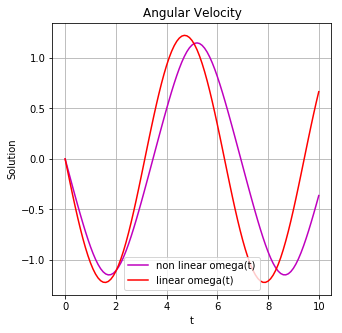

In [165]:
# Para la velocidad angular en ambos casos.
plt.plot(t, sol[:, 1], 'm', label='non linear omega(t)')
plt.plot(t, sollinear[:, 1], 'r', label='linear omega(t)')
plt.legend(loc='best')
plt.title('Angular Velocity')
plt.xlabel('t')
plt.ylabel('Solution')
plt.grid()
plt.show()


De manera similar, al inicio los valores de la solución parecen ser muy próximos, pero a medida de que aumenta el tiempo hay un desfase cada vez mayor, por lo que es notorio la diferencia entre un caso y el otro. Aquí es donde se puede concluir por qué funciona la aproximación para ángulos pequeños, pues es donde ambas coinciden.

**b)** Construye el espacio fase para una frecuencia natural unitaria, usando trayectorias que partan del reposo con un ángulo inicial que vaya de -90 a 90 grados, en intervalos de 10 grados. Suma dos trayectorias que den vueltas, una encontra de las manecillas del reloj y otra a favor.

Debido a que se debe realizar una gráfica para cada intervalo de 10 grados se realizó el siguiente código. La modificación que sufre respecto a los otros es que ahora se tiene un arreglo de valores para las condiciones iniciales de $\theta$ esto es debido a que se tiene que acceder a la función cada que la condición inicial del ángulo cambia.



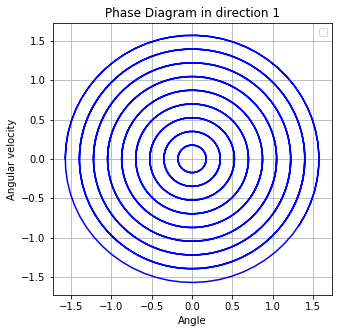

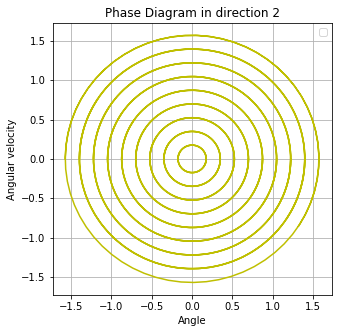

In [166]:
on = []  #Para las trayectorias en una dirección.
on1 = [] #Para las trayectorias en otro sentido.

w0 = 1 #Condición inicial.

def pend(y, t): #Ambos arreglos requieren la misma función, sólo cambia la condición incial con la que ésta opera
	theta, omega = y
	dydt = [omega, -w0**2*theta]
	return dydt

ran = range(-90, 90, 10) #Para una dirección.
ran1 = range(90, -90, -10) #Para otra dirección.
t = np.linspace(0, 10, 101) #Intervalo de tiempo.

wzero = 0 #Para la condicion inicial de omega en cada caso.

for i in range (0, 18): #Rango usado, son 18 casos debido a que se recorren 180 grados en intervalos de 10 grados.
	y0 = (ran[i]*3.1416/180, wzero) #Condiciones iniciales para la trayectoria en una dirección.
	y1 = (ran1[i]*3.1416/180, wzero) #Condiciones iniciales para la trayectoria en la otra dirección.
	on.append(odeint(pend, y0, t)) #Obtención de la solución para la trayectoria en una dirección.
	on1.append(odeint(pend, y1, t)) #Obtención de la solución para la trayectoria en la otra dirección.
    
for i in range (0, 18):    #Rango de oscilaciones
    plt.plot(on[i][:, 0] , on[i][:, 1], 'b')
plt.legend(loc='best')
plt.title('Phase Diagram in direction 1')
plt.xlabel('Angle')
plt.ylabel('Angular velocity')
plt.grid()
plt.show()

for i in range (0, 18):    #Rango de oscilaciones
    plt.plot(on[i][:, 0] , on[i][:, 1], 'y')
plt.legend(loc='best')
plt.title('Phase Diagram in direction 2')
plt.xlabel('Angle')
plt.ylabel('Angular velocity')
plt.grid()
plt.show()



Ahora se sumarán dos trayectorias. Como se ve en el código, lo que se hizo fue crear dos soluciones, una que comenzara en -90 grados y fuera hacia 90 grados y otra que fuera en la dirección opuesta, es decir, que comenzara en 90 grados y fuera hacia -90 grados. En las figuras de arriba se observa que no existe diferencia alguna entre los espacios fase, además de que parecen no estar todos los casos, pero no es así, pues después los primeros noventa grados se repiten las trayectorias, pero en sentido contrario. Al sumarse dos soluciones que tengan la misma condición inicial, una en cada sentido, los espacio fase se "restan", es decir, éste desaparece, como se ve a continuación.

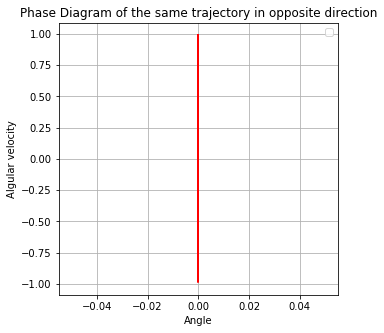

In [167]:
plt.plot(on[5][:, 0]+ on1[5][:, 0] , on[5][:, 1] + on1[5][:, 0], 'r') # Misma trayectoria en direcciones opuestas.
plt.legend(loc='best')
plt.title('Phase Diagram of the same trajectory in opposite direction')
plt.xlabel('Angle')
plt.ylabel('Algular velocity')
plt.grid()
plt.show()


Sin embargo, se obtienen unos gráficos muy interesantes cuando se suma toda una solución de valores en una dirección con una sola solución de valores en la dirección opuesta, se muestran 4 casos para comparar las diferencias.

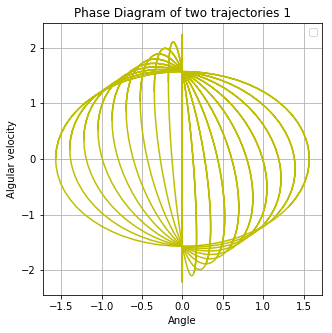

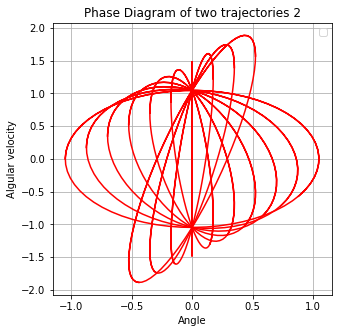

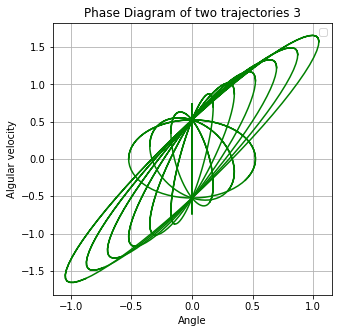

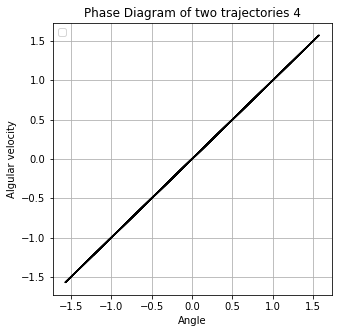

In [168]:
for i in range (0, 10):    #Porque después las trayectorias se repiten
    plt.plot(on[0][:, 0]+ on1[i][:, 0] , on[0][:, 1] + on1[i][:, 0], 'y') #Para el primer resultado
plt.legend(loc='best')
plt.title('Phase Diagram of two trajectories 1')
plt.xlabel('Angle')
plt.ylabel('Algular velocity')
plt.grid()
plt.show()

for i in range (0, 10):    #Porque después las trayectorias se repiten
    plt.plot(on[3][:, 0]+ on1[i][:, 0] , on[3][:, 1] + on1[i][:, 0], 'r') #Para el tercer resultado
plt.legend(loc='best')
plt.title('Phase Diagram of two trajectories 2')
plt.xlabel('Angle')
plt.ylabel('Algular velocity')
plt.grid()
plt.show()

for i in range (0, 10):    #Porque después las trayectorias se repiten
    plt.plot(on[6][:, 0]+ on1[i][:, 0] , on[6][:, 1] + on1[i][:, 0], 'g') #Para el quinto resultado
plt.legend(loc='best')
plt.title('Phase Diagram of two trajectories 3')
plt.xlabel('Angle')
plt.ylabel('Algular velocity')
plt.grid()
plt.show()

for i in range (0, 10):    #Porque después las trayectorias se repiten
    plt.plot(on[9][:, 0]+ on1[i][:, 0] , on[9][:, 1] + on1[i][:, 0], 'k') #Para el décimo resultado
plt.legend(loc='best')
plt.title('Phase Diagram of two trajectories 4')
plt.xlabel('Angle')
plt.ylabel('Algular velocity')
plt.grid()
plt.show()





Los primeros valores del arreglo corresponden a las amplitudes más grandes, debido a que la condición inicial para ellos es con un ángulo más grande, mientras que para los últimos los valores iniciales son muy pequeños, por lo que su velocidad máxima será menor y, por lo tanto, su amplitud también.

**3.- Ecuación no lineal amortiguada no forzada.**

**a)** Utiliza un parametro de amortiguamiento de 0.02, la frecuencia natural unitaria y observa cómo el espacio fase se distorsiona. Compara cada trayectoria del inciso b) del ejercio anterior con este caso amortiguado.

Ahora, se tiene que existe un parámetro de amortiguamiento, por lo que la ecuación cambiará un poco:

$\dot\omega$ + $\mu \omega$ + $\omega_0^2$ sin($\theta$) = 0

en donde $\omega = \dot\theta$

Entonces, tomando en cuenta las condiciones iniciales se realizó el siguiente código:

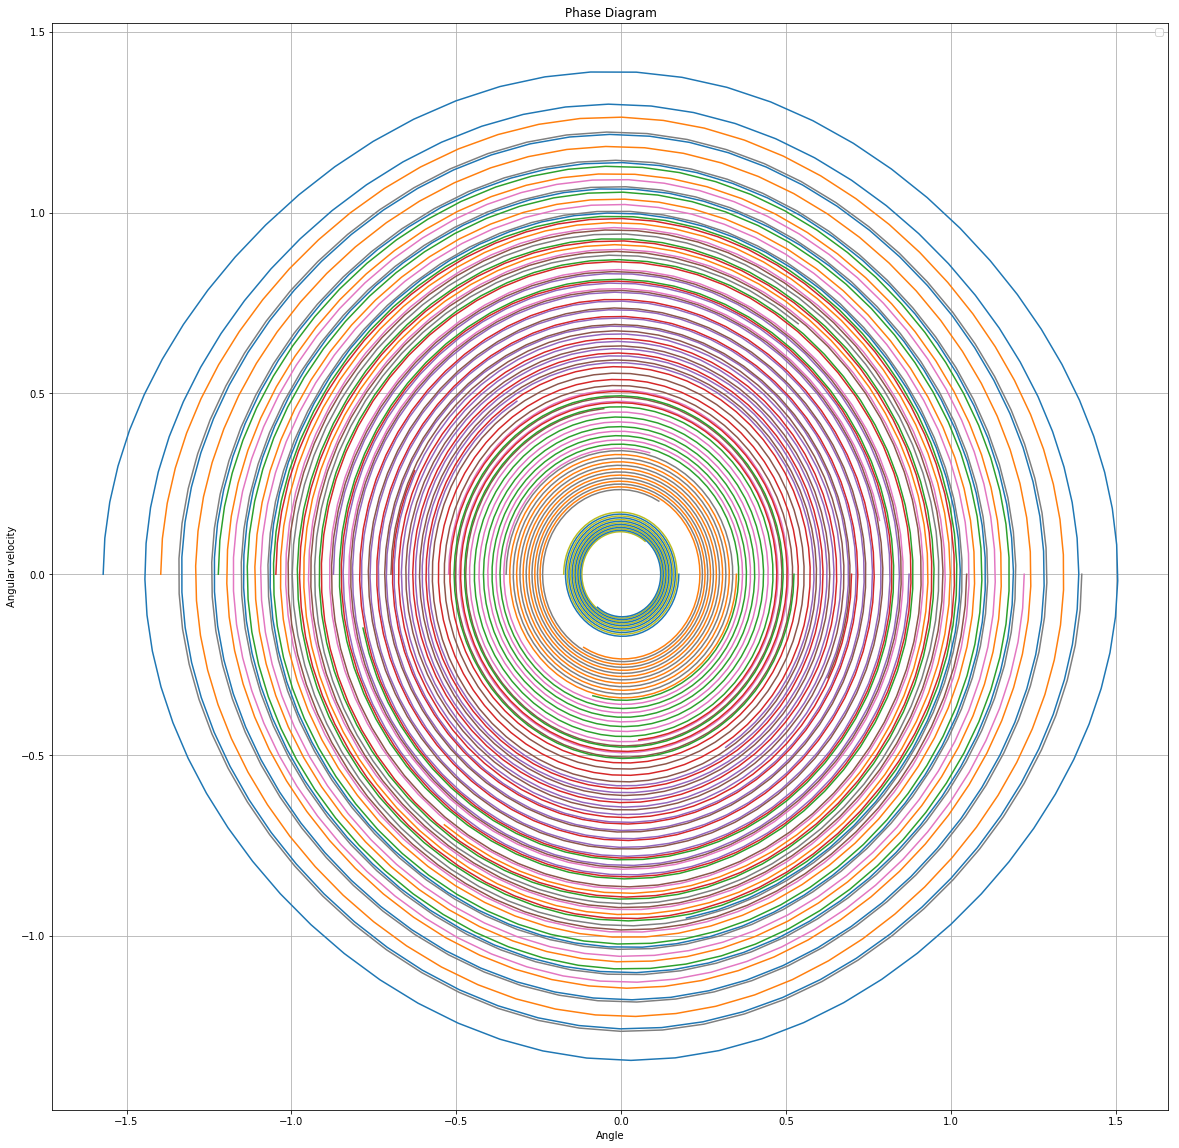

In [179]:
mu = 0.02 #Parámetro de amortiguamiento.
on = [] #Para los valores de la solución amortiguada.
w0 = 1 #Frecuencia natural unitaria.
sol = [] #Para los valores de la solución no amortiguada del inciso anterior.

def pend(y, t): #Caso amortiguado.
	theta, omega = y
	dydt = [omega, -mu * omega - w0**2 * math.sin(theta)]
	return dydt

def pend1(y, t): #Caso no amortiguado.
	theta2, omega2 = y
	dydt = [omega2, -w0**2*theta2]
	return dydt

ran = range(-90, 90, 10) #Para la dirección de la trayectoria del caso anterior.


t = np.linspace(0, 40, 401) #Intervalo de tiempo usado.

wzero = 0 #Para la condición inicial de omega en cada caso.

for i in range (0, 18): #Para las trayectorias en cada uno de los ángulos.
	y1 = (ran[i]*3.1416/180, wzero)
	on.append(odeint(pend1, y1, t))
	sol.append(odeint(pend, y1, t))
    
for i in range (0, 18): #Graficar todos los espacio fase en este caso.
    plt.plot(sol[i][:, 0], sol[i][:, 1])
plt.rcParams['figure.figsize'] = (20, 20)
plt.legend(loc='best')
plt.title('Phase Diagram')
plt.xlabel('Angle')
plt.ylabel('Angular velocity')
plt.grid()
plt.show()

Es evidente el cambio que existe, pues ahora cada vez que se completa un periodo disminuye la amplitud del movimiento y su velocidad, pero se llega a un caso límite. En la figura anterior se muestran todas las trayectorias obtenidas como ejemplo. Pero ahora se mostrará un solo caso para apreciar mejor la forma del mismo.

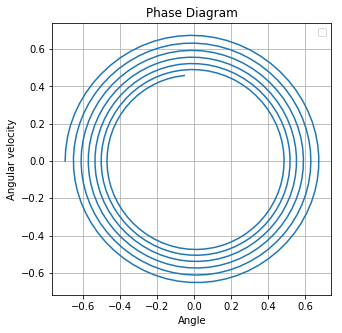

In [181]:
plt.plot(sol[5][:, 0], sol[5][:, 1])
plt.rcParams['figure.figsize'] = (5, 5)
plt.legend(loc='best')
plt.title('Phase Diagram')
plt.xlabel('Angle')
plt.ylabel('Angular velocity')
plt.grid()
plt.show()

Se comienza con una amplitud y una velocidad, ambos decrementan con el tiempo. La diferencia entre cada espacio fase de la figura anterior radica en que cada una de las trayectorias comienza con un ángulo distinto, por ello no serán iguales a menos que tengan las mismas condiciones iniciales.

Ahora se realizará la comparación entre el caso amortiguado y el no amortiguado, donde uno de ellos aparece como el caso límite del otro. Sólo se muestran los primeros 11 casos, más adelante se explica el porqué se realizó lo anterior.

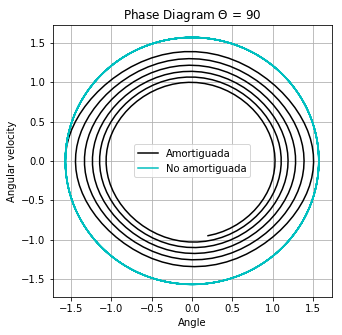

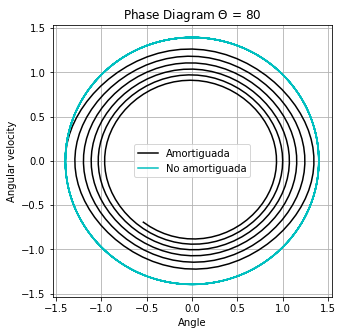

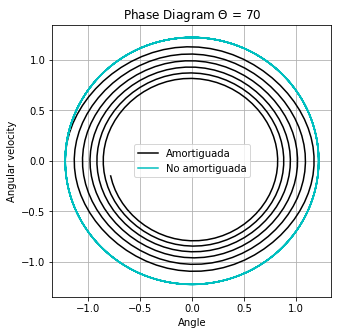

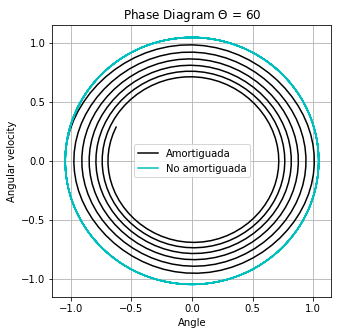

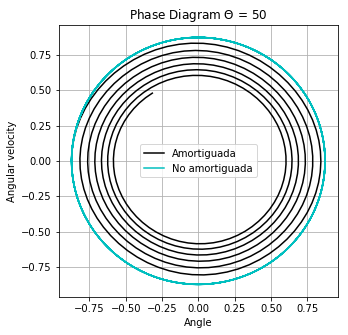

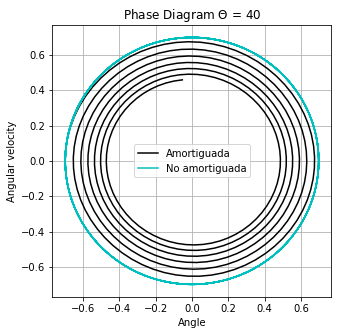

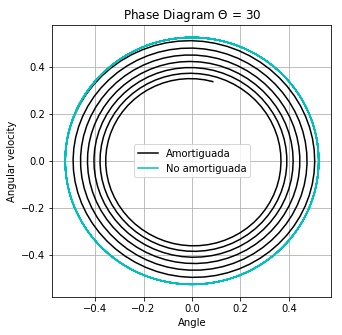

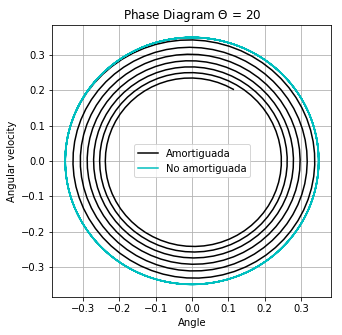

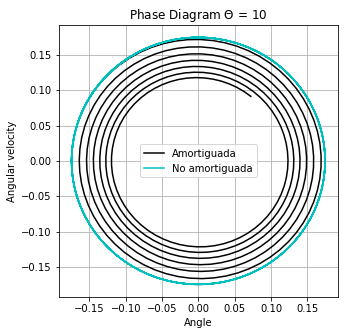

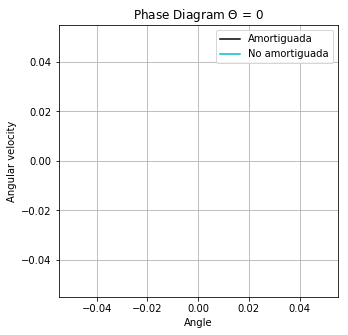

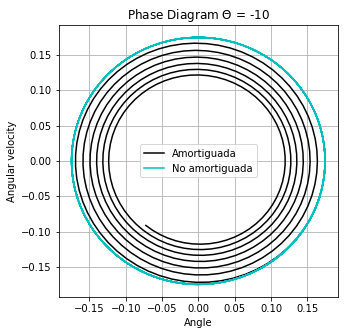

In [171]:
plt.plot(sol[0][:, 0], sol[0][:, 1], 'k', label='Amortiguada')
plt.plot(on[0][:, 0], on[0][:, 1], 'c', label = 'No amortiguada')
plt.legend(loc='best')
plt.title('Phase Diagram $\Theta$ = 90')
plt.xlabel('Angle')
plt.ylabel('Angular velocity')
plt.grid()
plt.show()

plt.plot(sol[1][:, 0], sol[1][:, 1], 'k', label='Amortiguada')
plt.plot(on[1][:, 0], on[1][:, 1], 'c', label = 'No amortiguada')
plt.legend(loc='best')
plt.title('Phase Diagram $\Theta$ = 80')
plt.xlabel('Angle')
plt.ylabel('Angular velocity')
plt.grid()
plt.show()

plt.plot(sol[2][:, 0], sol[2][:, 1], 'k', label='Amortiguada')
plt.plot(on[2][:, 0], on[2][:, 1], 'c', label = 'No amortiguada')
plt.legend(loc='best')
plt.title('Phase Diagram $\Theta$ = 70')
plt.xlabel('Angle')
plt.ylabel('Angular velocity')
plt.grid()
plt.show()

plt.plot(sol[3][:, 0], sol[3][:, 1], 'k', label='Amortiguada')
plt.plot(on[3][:, 0], on[3][:, 1], 'c', label = 'No amortiguada')
plt.legend(loc='best')
plt.title('Phase Diagram $\Theta$ = 60')
plt.xlabel('Angle')
plt.ylabel('Angular velocity')
plt.grid()
plt.show()

plt.plot(sol[4][:, 0], sol[4][:, 1], 'k', label='Amortiguada')
plt.plot(on[4][:, 0], on[4][:, 1], 'c', label = 'No amortiguada')
plt.legend(loc='best')
plt.title('Phase Diagram $\Theta$ = 50')
plt.xlabel('Angle')
plt.ylabel('Angular velocity')
plt.grid()
plt.show()

plt.plot(sol[5][:, 0], sol[5][:, 1], 'k', label='Amortiguada')
plt.plot(on[5][:, 0], on[5][:, 1], 'c', label = 'No amortiguada')
plt.legend(loc='best')
plt.title('Phase Diagram $\Theta$ = 40')
plt.xlabel('Angle')
plt.ylabel('Angular velocity')
plt.grid()
plt.show()

plt.plot(sol[6][:, 0], sol[6][:, 1], 'k', label='Amortiguada')
plt.plot(on[6][:, 0], on[6][:, 1], 'c', label = 'No amortiguada')
plt.legend(loc='best')
plt.title('Phase Diagram $\Theta$ = 30')
plt.xlabel('Angle')
plt.ylabel('Angular velocity')
plt.grid()
plt.show()

plt.plot(sol[7][:, 0], sol[7][:, 1], 'k', label='Amortiguada')
plt.plot(on[7][:, 0], on[7][:, 1], 'c', label = 'No amortiguada')
plt.legend(loc='best')
plt.title('Phase Diagram $\Theta$ = 20')
plt.xlabel('Angle')
plt.ylabel('Angular velocity')
plt.grid()
plt.show()

plt.plot(sol[8][:, 0], sol[8][:, 1], 'k', label='Amortiguada')
plt.plot(on[8][:, 0], on[8][:, 1], 'c', label = 'No amortiguada')
plt.legend(loc='best')
plt.title('Phase Diagram $\Theta$ = 10')
plt.xlabel('Angle')
plt.ylabel('Angular velocity')
plt.grid()
plt.show()

plt.plot(sol[9][:, 0], sol[9][:, 1], 'k', label='Amortiguada')
plt.plot(on[9][:, 0], on[9][:, 1], 'c', label = 'No amortiguada')
plt.legend(loc='best')
plt.title('Phase Diagram $\Theta$ = 0')
plt.xlabel('Angle')
plt.ylabel('Angular velocity')
plt.grid()
plt.show()

plt.plot(sol[10][:, 0], sol[10][:, 1], 'k', label='Amortiguada')
plt.plot(on[10][:, 0], on[10][:, 1], 'c', label = 'No amortiguada')
plt.legend(loc='best')
plt.title('Phase Diagram $\Theta$ = -10')
plt.xlabel('Angle')
plt.ylabel('Angular velocity')
plt.grid()
plt.show()



Se grafican los primeros 11 casos, en los cuales es evidente que conforme se tienen condiciones inciales con valores más pequeños la amplitud de los valores también es menor. Recuerde que se parte de un ángulo negativo de 90 grados y se tienen los casos hasta llegar a 90 grados positivos. Nótese cómo el caso no amortiguado aparece como el caso límite del caso amortiguado, es decir, el caso amortiguado parte del caso no amortiguado al principio para posteriormente comenzar a reducir sus valores. En el caso donde se tiene el vector número 9 no hay ningún dato porque corresponde a la trayectoria donde el valor inicial de $\theta$ es cero, por lo que no hay movimiento, pero es evidente que cuando se pasa al siguiente caso se retoma la gráfica, ahora los valores se invierten y comenzarán a ampliar sus amplitudes en cada caso debido a que ahora se llegará hasta los 90 grados del otro lado, por ello no se muestran las 18 gráficas. Ahora, se muestran 3 casos distintos para ángulo y velocidad, de tal manera que se pueda ver la diferencia entre el caso amortiguado y el no amortiguado.


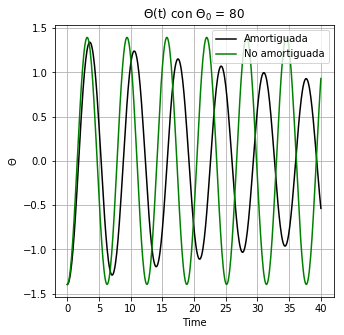

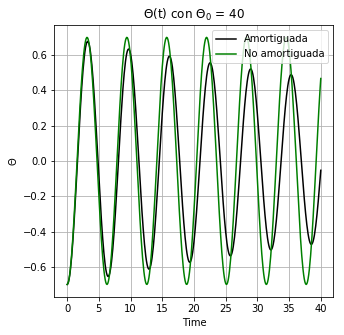

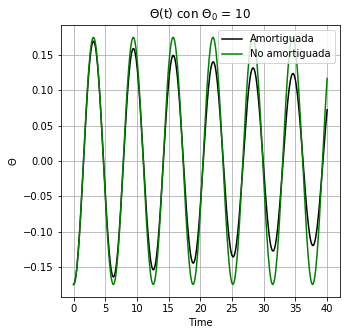

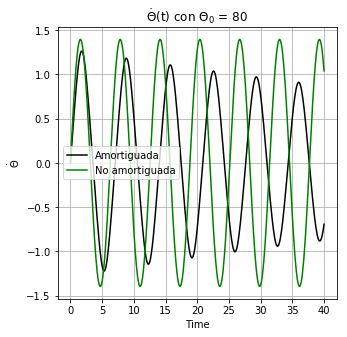

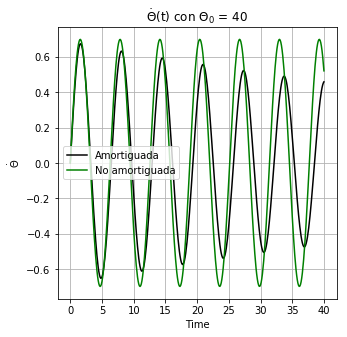

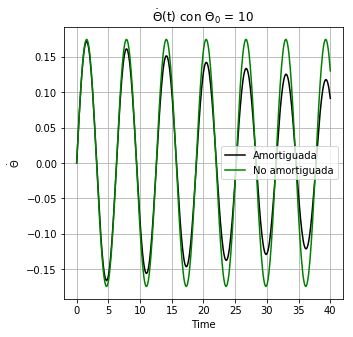

In [172]:
plt.plot(t, sol[1][:, 0], 'k', label='Amortiguada')
plt.plot(t, on[1][:, 0], 'g', label = 'No amortiguada')
plt.legend(loc='best')
plt.title('$\Theta$(t) con $\Theta_0$ = 80')
plt.xlabel('Time')
plt.ylabel('$\Theta$')
plt.grid()
plt.show()

plt.plot(t, sol[5][:, 0], 'k', label='Amortiguada')
plt.plot(t, on[5][:, 0], 'g', label = 'No amortiguada')
plt.legend(loc='best')
plt.title('$\Theta$(t) con $\Theta_0$ = 40')
plt.xlabel('Time')
plt.ylabel('$\Theta$')
plt.grid()
plt.show()

plt.plot(t, sol[8][:, 0], 'k', label='Amortiguada')
plt.plot(t, on[8][:, 0], 'g', label = 'No amortiguada')
plt.legend(loc='best')
plt.title('$\Theta$(t) con $\Theta_0$ = 10')
plt.xlabel('Time')
plt.ylabel('$\Theta$')
plt.grid()
plt.show()

plt.plot(t, sol[1][:, 1], 'k', label='Amortiguada')
plt.plot(t, on[1][:, 1], 'g', label = 'No amortiguada')
plt.legend(loc='best')
plt.title('$\dot\Theta$(t) con $\Theta_0$ = 80')
plt.xlabel('Time')
plt.ylabel('$\dot\Theta$')
plt.grid()
plt.show()

plt.plot(t, sol[5][:, 1], 'k', label='Amortiguada')
plt.plot(t, on[5][:, 1], 'g', label = 'No amortiguada')
plt.legend(loc='best')
plt.title('$\dot\Theta$(t) con $\Theta_0$ = 40')
plt.xlabel('Time')
plt.ylabel('$\dot\Theta$')
plt.grid()
plt.show()

plt.plot(t, sol[8][:, 1], 'k', label='Amortiguada')
plt.plot(t, on[8][:, 1], 'g', label = 'No amortiguada')
plt.legend(loc='best')
plt.title('$\dot\Theta$(t) con $\Theta_0$ = 10')
plt.xlabel('Time')
plt.ylabel('$\dot\Theta$')
plt.grid()
plt.show()


En cualquiera de las soluciones, es notorio cómo la solución amortiguada va disminuyendo su amplitud, mientras que la otra, no lo hace, su amplitud es la misma. También es factible comparar la amplitud para cada caso, mientras más pequeño es el ángulo inicial menor es la amplitud que tendrá el oscilador. La forma de estas gráficas es independiente de las condiciones iniciales que sean diferentes de cero.

**4.- Ecuación no lineal completa.**

**a)** Usando $\mu = 3\pi/2$, $\quad w = 2\pi$, $\quad w_0= 3\pi$, grafica la solución para cinco casos de A alrededor de 1.05. Qué pasa con las soluciones. ¿Qué ocurre si A=2?

Ahora, la ecuación lineal completa es $$\ddot{\theta}+\mu \dot{\theta}+\sin(\theta)=A \cos (w_d \ t)$$, con lo que se pueden tomar las condiciones iniciales directamente y graficar los 5 casos alrededor de A = 1.05.

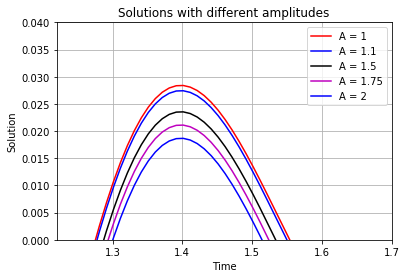

In [3]:
pi = 3.141592 #Por simplicidad.
Ej4A = [] #Para guardar las soluciones.

def pend(y, t, A, w0, omega, mu):
	theta, omega = y
	dydt = [omega, - mu * omega - w0**2 * math.sin(theta) - A * math.cos(omega * t)]
	return dydt

mu = 3 * pi/2
omega = 2 * pi
w0 = 3 * pi
y0 = [pi/3, 0]

A = [1.0, 1.1, 1.5, 1.75, 2.0, 1.05, 50] #Todos los valores de A usados.

t = np.linspace(0, 10, 1000) #Rango 

for i in range (0, 7):
	Ej4A.append(odeint(pend, y0, t, args=(A[i], w0, omega, mu)))

plt.plot(t, Ej4A[0][:, 0], 'r', label = 'A = 1')
plt.plot(t, Ej4A[1][:, 0], 'b', label = 'A = 1.1')
plt.plot(t, Ej4A[2][:, 0], 'k', label = 'A = 1.5')
plt.plot(t, Ej4A[3][:, 0], 'm', label = 'A = 1.75')
plt.plot(t, Ej4A[4][:, 0], 'b', label = 'A = 2')
plt.legend(loc='best',bbox_to_anchor=(1, 1))
plt.title('Solutions with different amplitudes')
plt.rcParams['figure.figsize'] = (5, 5)
plt.xlabel('Time')
plt.ylabel('Solution')
plt.ylim(0, 0.04)
plt.xlim(1.22, 1.7)
plt.grid()
plt.show()


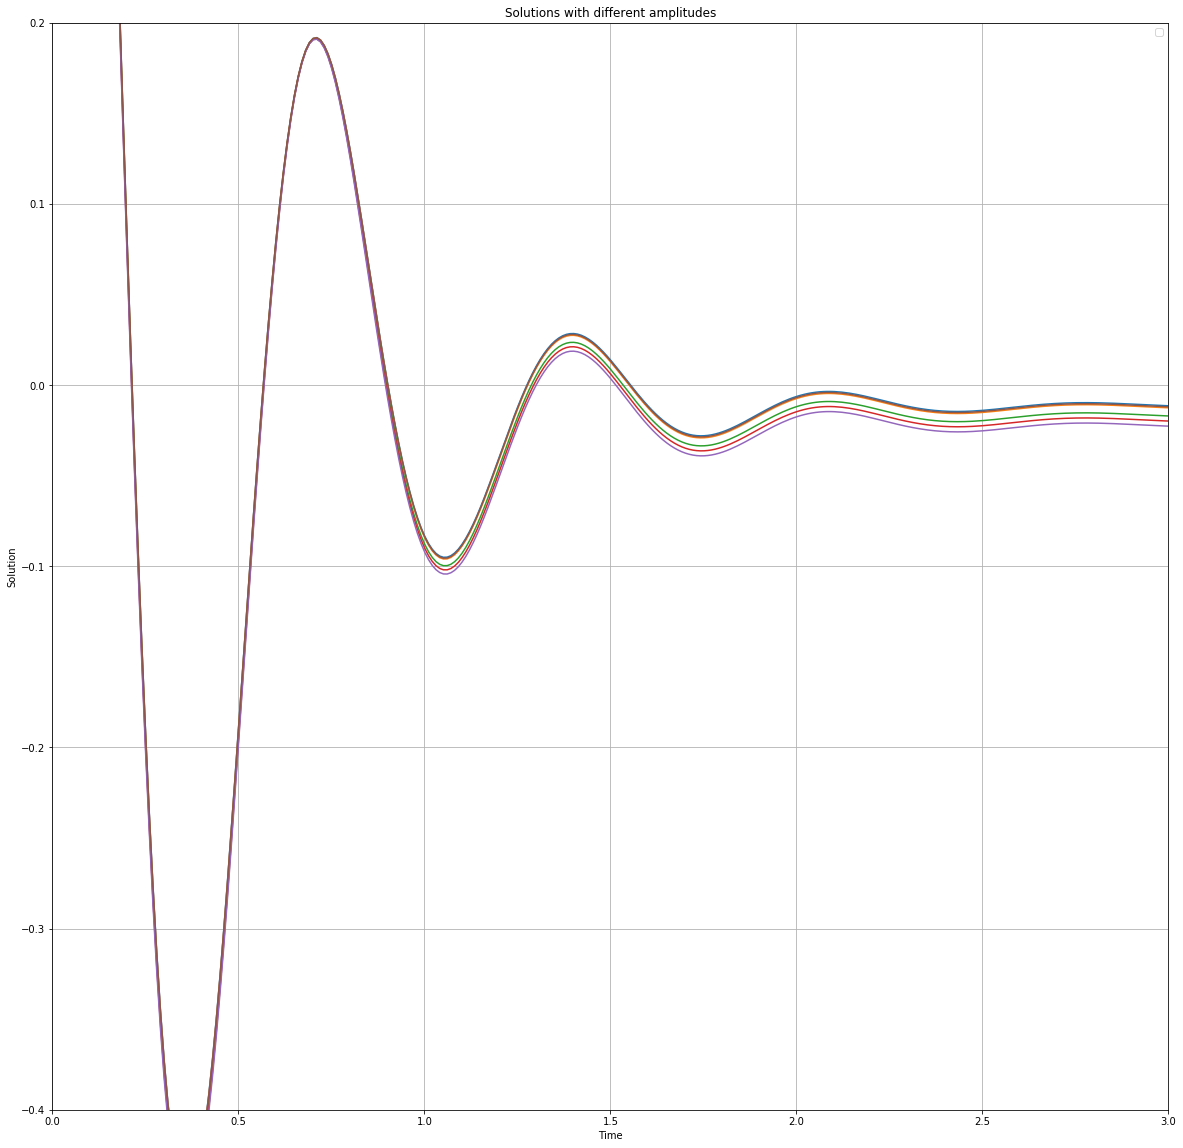

In [213]:
for i in range (0, 6):
    plt.plot(t, Ej4A[i][:, 0])
plt.legend(loc='best')
plt.rcParams['figure.figsize'] = (20, 20)
plt.title('Solutions with different amplitudes')
plt.xlabel('Time')
plt.ylabel('Solution')
plt.xlim(0, 3)
plt.ylim(-0.4, 0.2)
plt.grid()
plt.show()

Para que sean evidentes los cambios en la gráfica ante la modificación de A se ha realizado esta ampliación, donde se enfoca en una de las curvas de las gráficas, para apreciar la gráfica completa y comparar entre los valores pedidos se muestra lo siguiente:

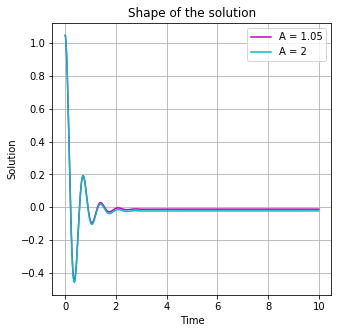

In [208]:
plt.plot(t, Ej4A[5][:, 0], 'm', label = 'A = 1.05')
plt.plot(t, Ej4A[4][:, 0], 'c', label = 'A = 2')
plt.legend(loc='best')
plt.rcParams['figure.figsize'] = (5, 5)
plt.title('Shape of the solution')
plt.xlabel('Time')
plt.ylabel('Solution')
plt.grid()
plt.show()

Nuevamente realizaremos una ampliación para apreciar los detalles en las curvas de ambas gráficas.

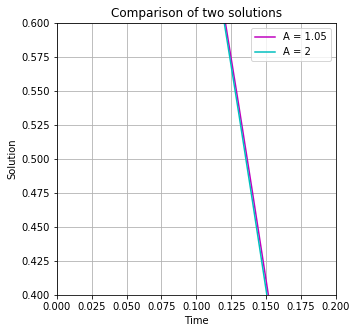

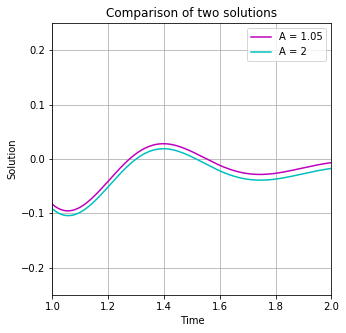

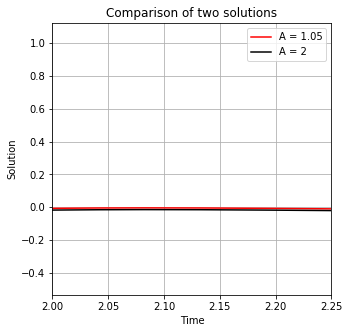

In [209]:
plt.plot(t, Ej4A[5][:, 0], 'm', label = 'A = 1.05')
plt.plot(t, Ej4A[4][:, 0], 'c', label = 'A = 2')
plt.legend(loc='best',bbox_to_anchor=(1, 1))
plt.title('Comparison of two solutions')
plt.xlabel('Time')
plt.ylabel('Solution')
plt.xlim(0, 0.2)
plt.ylim(0.4, 0.6)
plt.grid()
plt.show()

plt.plot(t, Ej4A[5][:, 0], 'm', label = 'A = 1.05')
plt.plot(t, Ej4A[4][:, 0], 'c', label = 'A = 2')
plt.legend(loc='best',bbox_to_anchor=(1, 1))
plt.title('Comparison of two solutions')
plt.xlabel('Time')
plt.ylabel('Solution')
plt.xlim(1, 2)
plt.ylim(-0.25, 0.25)
plt.grid()
plt.show()

plt.plot(t, Ej4A[5][:, 0], 'r', label = 'A = 1.05')
plt.plot(t, Ej4A[4][:, 0], 'k', label = 'A = 2')
plt.legend(loc='best',bbox_to_anchor=(1, 1))
plt.title('Comparison of two solutions')
plt.xlabel('Time')
plt.ylabel('Solution')
plt.xlim(2, 2.25)
plt.grid()
plt.show()


Se observa que las gráficas parten de valores muy similares, después existe una separación entre ellos en las primeras curvas al bajar de su valor máximo para después unirse nuevamente conforme se toman valores de tiempo más grandes. Debido a que las condiciones iniciales de esos dos casos no varían demasiado no es muy evidente el cambio en los gráficos de las mismas. Sin embargo, si se tuvieran valores de *A* muy diferentes para ambos casos sería más evidente en la gráfica la dispersión entre los datos.

**b)** Obten las trayectorias en el espacio fase de los casos del inciso anterior.

La función anterior no cambia, lo único que se hace es que ahora se grafican ambos valores de la solución para cada caso.

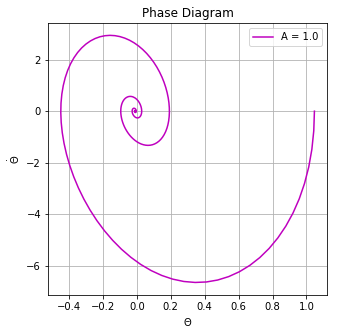

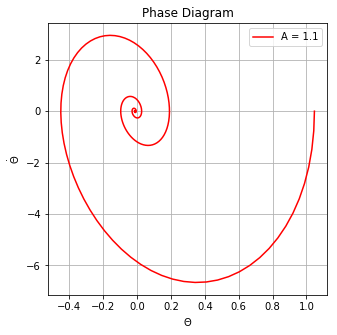

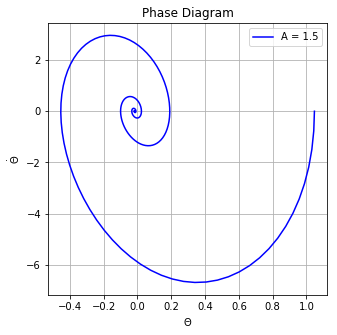

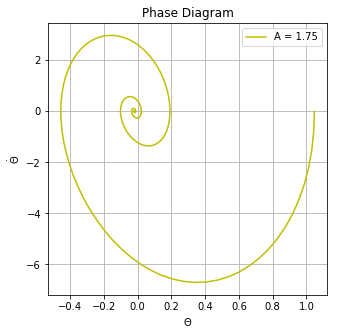

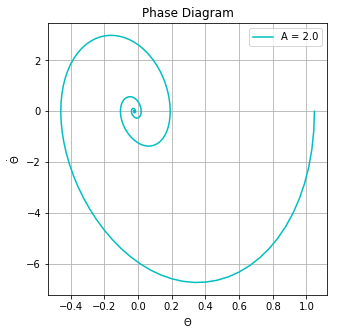

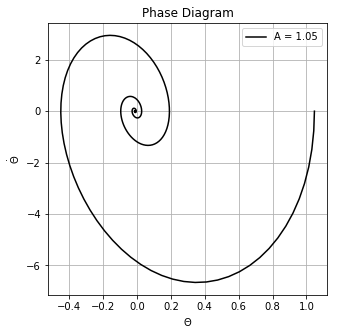

In [222]:
plt.plot(Ej4A[0][:, 0], Ej4A[0][:, 1], 'm', label = 'A = 1.0')
plt.legend(loc='best')
plt.title('Phase Diagram')
plt.xlabel('$\Theta$')
plt.ylabel('$\dot\Theta$')
plt.grid()
plt.show()

plt.plot(Ej4A[1][:, 0], Ej4A[1][:, 1], 'r', label = 'A = 1.1')
plt.legend(loc='best')
plt.title('Phase Diagram')
plt.xlabel('$\Theta$')
plt.ylabel('$\dot\Theta$')
plt.grid()
plt.show()

plt.plot(Ej4A[2][:, 0], Ej4A[2][:, 1], 'b', label = 'A = 1.5')
plt.legend(loc='best')
plt.title('Phase Diagram')
plt.xlabel('$\Theta$')
plt.ylabel('$\dot\Theta$')
plt.grid()
plt.show()

plt.plot(Ej4A[3][:, 0], Ej4A[3][:, 1], 'y', label = 'A = 1.75')
plt.legend(loc='best')
plt.title('Phase Diagram')
plt.xlabel('$\Theta$')
plt.ylabel('$\dot\Theta$')
plt.grid()
plt.show()

plt.plot(Ej4A[4][:, 0], Ej4A[4][:, 1], 'c', label = 'A = 2.0')
plt.legend(loc='best')
plt.title('Phase Diagram')
plt.xlabel('$\Theta$')
plt.ylabel('$\dot\Theta$')
plt.grid()
plt.show()

plt.plot(Ej4A[5][:, 0], Ej4A[5][:, 1], 'k', label = 'A = 1.05')
plt.legend(loc='best')
plt.title('Phase Diagram')
plt.xlabel('$\Theta$')
plt.ylabel('$\dot\Theta$')
plt.grid()
plt.show()

Al realizar las gráficas de los espacio fase no se nota mucha diferencia entre ellas durante toda la trayectoria, con excepción del centro de la figura, pues mientras más grande es el valor de A se observa un diámetro mayor en las curvas con respecto al eje x. Ahora que se observaron los espacio fase por separado, es posible ponerlos a todos en una misma gráfica sólo para verificar que las variaciones sí son mínimas.


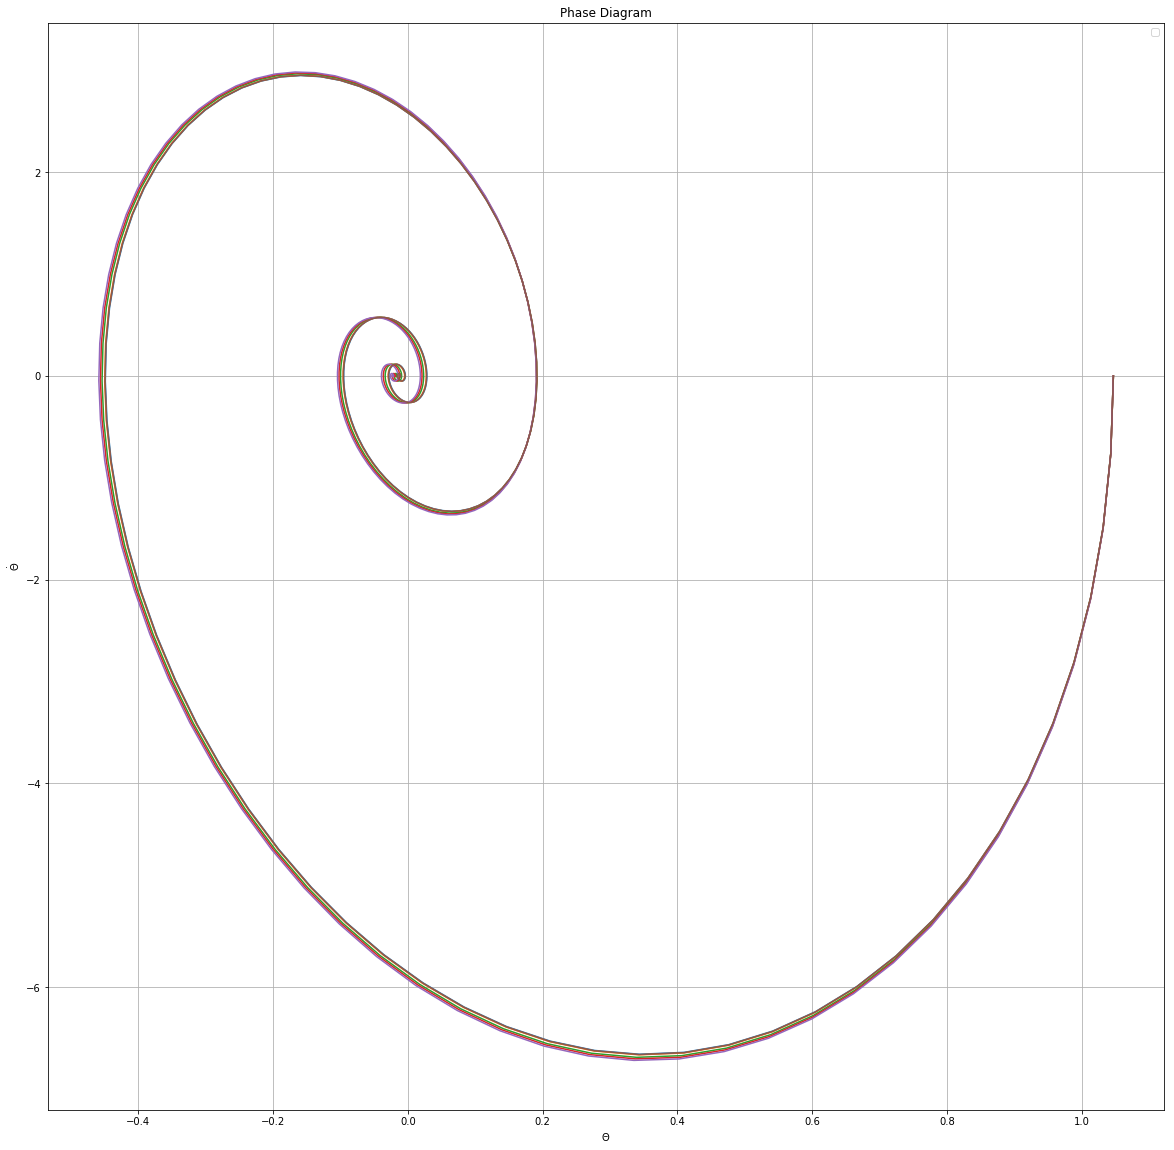

In [224]:
for i in range (0,6):
    plt.plot(Ej4A[i][:, 0], Ej4A[i][:, 1])
plt.legend(loc='best')
plt.rcParams['figure.figsize'] = (20, 20)
plt.title('Phase Diagram')
plt.xlabel('$\Theta$')
plt.ylabel('$\dot\Theta$')
plt.grid()
plt.show()


Entonces, cuando se tiene un oscilador amortiguado y forzado los valores el movimiento va disminuyendo hasta que se aproxima al reposo. Los valores seleccionados para *A* son muy próximos entre sí, por ello, se incluye un caso con una amplitud muy grande para comparar la diferencia con los casos anteriores.

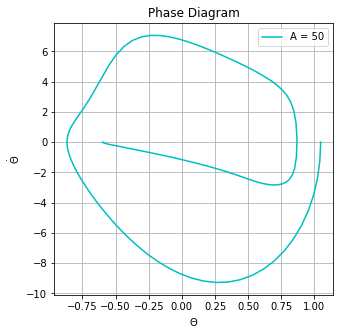

In [226]:
plt.plot(Ej4A[6][:, 0], Ej4A[6][:, 1], 'c', label = 'A = 50')
plt.legend(loc='best')
plt.rcParams['figure.figsize'] = (5, 5)
plt.title('Phase Diagram')
plt.xlabel('$\Theta$')
plt.ylabel('$\dot\Theta$')
plt.grid()
plt.show()


Entonces, se puede apreciar que cuando el oscilador está forzado de tal manera, su espacio fase ni siquiera parece coincidir con el de un oscilador, pues los valores donde la velocidad es máxima no parecen coincidir con los mínimos en la amplitud, sino que se presentan distorsiones más particulares. Incluso si la condicion inicial del ángulo fuera cero se observaría una trayectoria en los gráficos, pues para el caso forzado existe una fuerza externa que interfiere con el movimiento del oscilador. Para las condiciones iniciales solicitades no es posible observar cuando los osciladores llegan a su caso límite, pero se puede observar que sí existen diferencias notorias cuando se modifica radicalmente alguno de los parmámetros iniciales.